In [1]:
# 로지스틱 회귀

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#sigmoid 함수 작성하기
def sigmoid(x):
    #numpy.exp() 함수는 밑이 자연상수 e인 지수함수(e^x)로 변환
    return 1 / (1+np.exp(-x))

#함수 테스트용 데이터 생성하기
test = np.array([-1, 0, 1])

#작성된 함수 확인하기
print(sigmoid(test))

[0.26894142 0.5        0.73105858]


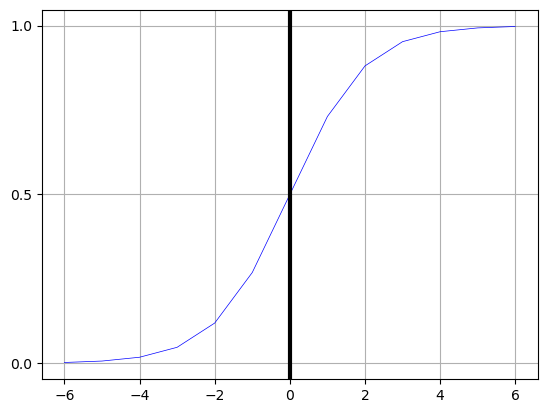

In [4]:
#그래프 적용을 위한 데이터 만들기
sigmoid_x = range(-6, 7)
sigmoid_y = sigmoid(np.array(sigmoid_x))

#선 그래프 그리기
plt.plot(sigmoid_x, sigmoid_y, color='blue', linewidth=0.5)

#백그라운드 모눈종이 설정하기
plt.rcParams['axes.grid'] = True

#선 굵기 설정하기
plt.axvline(x=0, color='black', linewidth=3)

#y축 범위 설정하기
plt.yticks([0,0.5,1])
plt.show()

In [5]:
#학습 데이터 생성
x_train = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y_train = [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]

#추론을 위한 데이터 생성하기
x_test = [0,1,2,18,19]
y_test = [0,0,0,1,1]

#학습 데이터에 대해 numpy로 변경 및 행을 열로 변경하기
x_train = np.array(x_train).reshape([-1,1])
y_train = np.array(y_train)

#추론 데이터에 대해 numpy로 변경 및 행을 열로 변경하기
x_test = np.array(x_test).reshape([-1,1])
y_test = np.array(y_test)

#데이터 확인하기
print(x_train)
print(y_train)

[[ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


In [7]:
# ↑ 9에서 10으로 넘어갈 때 0에서 1로 변하는 데이터 준비 완료
# 이제 이 데이터를 토대로 최적의 선을 통해 분류하는지 확인

In [8]:
#로지스틱 회귀 학습하기
from sklearn.linear_model import LogisticRegression

#로지스틱 회귀 생성하기
logi_reg = LogisticRegression()

#학습하기
logi_reg.fit(x_train, y_train)

#기울기 절편 있는지 확인
print('intercept:', logi_reg.intercept_)
print('coef:', logi_reg.coef_)

intercept: [-11.34126808]
coef: [[1.19383367]]


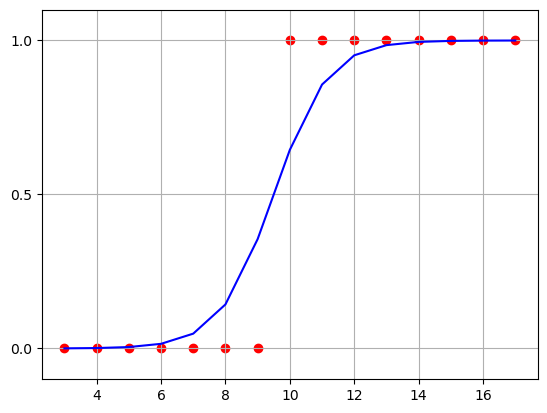

In [9]:
#로지스틱 회귀 그래프 만들기
odd = []
for i in x_train:
    odd.append((logi_reg.coef_*i) + logi_reg.intercept_)

sigmoid_y = sigmoid(np.array(odd))
sigmoid_y = sigmoid_y.reshape(-1,1)

#역산된 그래프 표시하기
plt.scatter(x_train, y_train, color='red')
plt.plot(np.array(x_train), sigmoid_y, color='blue')
plt.rcParams['axes.grid'] = True
plt.yticks([0,0.5,1])
plt.ylim([-0.1,1.1])
plt.show()

In [10]:
# 로지스틱 회귀와 선형회귀를 비교하기 위한
# 선형회귀 모델링
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print('intercept: ', lr.intercept_)
print('coef ', lr.coef_)

intercept:  -0.4666666666666669
coef  [0.1]


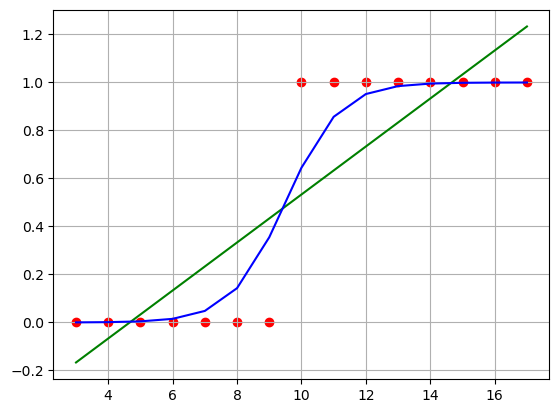

1.0
0.3981481481481476


In [13]:
#비교하기
coef_intercept = x_train*lr.coef_+lr.intercept_
plt.scatter(x_train, y_train, color='red')
#선형 회귀
plt.plot(np.array(x_train), coef_intercept, color='green')
#로지스틱 회귀
plt.plot(np.array(x_train), sigmoid_y, color='blue')
plt.rcParams['axes.grid'] = True
plt.show()
print(logi_reg.score(x_test,y_test))
print(lr.score(x_test,y_test))